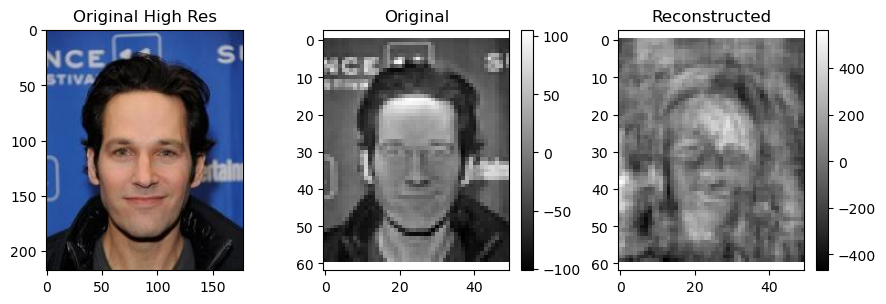

In [139]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

def load_and_center_dataset(filename):
    #dataset loaded
    x = np.load('celeba_60x50.npy')
    
    #center the dataset to origin
    mean_of_x = np.mean(x, axis=0)
    
    return x - mean_of_x
    
def get_covariance(dataset):
    #get the number of samples
    dataset_length = len(dataset)
    data_transpose = np.transpose(dataset)
    xt_x = np.dot(data_transpose, dataset)
    
    return xt_x / (dataset_length - 1)

def get_eig(S, k):
    #decomposition??
    eigvals, eigvecs = eigh(S, subset_by_index=[len(S) - k, len(S) - 1])
    
    #change from ascending to descending
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    Lambda = np.diag(eigvals)
    
    return Lambda, eigvecs

def get_eig_prop(S, prop):
    eigenvals, eigenvecs = eigh(S)

    sorted_indices = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[sorted_indices]
    eigenvecs = eigenvecs[:, sorted_indices]
    
    #calculate variance proportion
    sum_variance = np.sum(eigenvals)
    calculated_variance = eigenvals / sum_variance
    
    #find EV outside of proportion
    proportion_outline = np.where(explained_variance > prop)[0]
    Lambda = np.diag(eigenvals[proportion_outline])
    U = eigenvecs[:, proportion_outline]
    
    return Lambda, U

def project_and_reconstruct_image(image, U):
    U_transpose = np.transpose(U)
    U_Space = np.dot(U_transpose, image)
    
    reconstructed_image = np.dot(U, U_Space)
    
    return reconstructed_image

def display_image(im_orig_fullres, im_orig, im_reconstructed):
    # Please use the format below to ensure grading consistency
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9,3), ncols=3)
    fig.tight_layout()

    im_orig_fullres = im_orig_fullres.reshape(218, 178, 3)
    
    ax1.imshow(im_orig_fullres)
    ax1.set_title("Original High Res")
    ax1.set_aspect('equal')
    
    #low-resolution image to 60x50
    im_orig_reshaped = im_orig.reshape(60, 50)
    ax2.imshow(im_orig_reshaped, cmap='gray')
    ax2.set_title("Original")
    ax2.axis('equal')
    
    # Reshape the reconstructed image to 60x50
    im_reconstructed_reshaped = im_reconstructed.reshape(60, 50)
    ax3.imshow(im_reconstructed_reshaped, cmap='gray')
    ax3.set_title("Reconstructed")
    ax3.axis('equal')
    
    # Add colorbars for the low-res and reconstructed images
    plt.colorbar(ax2.imshow(im_orig_reshaped, cmap='gray'), ax=ax2)
    plt.colorbar(ax3.imshow(im_reconstructed_reshaped, cmap='gray'), ax=ax3)
    
    return fig, ax1, ax2, ax3

def perturb_image(image, U, sigma):
    U_transpose = np.transpose(U)
    U_Space = np.dot(U_transpose, image)
    
    #we add gaussian noise
    perturbation = np.random.normal(0, sigma, U_Space.shape)
    perturbed_space = U_Space + perturbation
    
    #remake image with the weightss
    reconstructed_image = np.dot(U, perturbed_space)
    
    return reconstructed_image